In [3]:
using JuMP
using GLPK
#using Xpress
using Plots

## Q1
Find an optimal solution to the instance of the Diet problem that was provided in Lectures 4, i.e.,

Minimise\ 20x_1+8x_2
$$Minimise\ 20x_1+8x_2$$

<div style="text-align: center"> Subject to constraint: </div>
$$32x_1 + 12x_2 \ge 24 $$
$$8x_1 + 20x_2 \ge 12 $$
$$x_1 + x_2 \ge 1$$

$$x_1\ge 0,x_2\ge 0$$



In [4]:
model = Model(GLPK.Optimizer)
@variable(model, x1 >= 0)
@variable(model, x2 >= 0)
@constraint(model, 32 * x1 + 12 * x2 >= 24)
@constraint(model, 8 * x1 + 20 * x2 >= 12)
@constraint(model, x1 + x2 >= 1)
@objective(model, Min, 20 * x1 + 8 * x2)
optimize!(model)
println("x1 = ", value(x1))
println("x2 = ", value(x2))
println("objective value = ", objective_value(model))

x1 = 0.6
x2 = 0.39999999999999997
objective value = 15.2


Exercise Question
## Q1 
Solve the other example from the lecture in a similar way. The example was as follows:
A company manufactures 2 kinds of staplers: regular and heavy duty. Each regular stapler requires 2 hours of assembly time and 1 hour of finishing time per week, while each heavy duty stapler requires 4 hours of assembly time and 3 hours of finishing time per week. The assembly department has at most 160 hours available per week, and the finishing department has at most 105 hours available. Each regular stapler contributes Euro15 to profits, and each heavy duty stapler contributes Euro 32. 

How many of each kind of stapler should the company manufacture this week in order to maximise profits (assuming all staplers made are sold)?

In [30]:
model = Model(GLPK.Optimizer)
@variable(model, regular >= 0)
@variable(model, heavy >= 0)
@constraint(model, 2 * regular + 4 * heavy <= 160)
@constraint(model, 1 * regular + 3 * heavy <= 105)
@objective(model, Max, 15 * regular + 32 * heavy)
optimize!(model)
println("The number of regular stapler: ", value(regular))
println("The number of heavy stapler: ", value(heavy))
println("The maximum profit: ", objective_value(model))

The number of regular stapler: 30
The number of heavy stapler: 25.0
The maximum profit: 1250.0


## Q2 
Reddy Mikks produces both interior and exterior paints from two raw materials, M1 and M2. The following table provides the basic data of the problem:

|  | Exterior Paint | Interior Paint | Maximum Daily Availability (tons) |
| :- | :-: | :-: | :-: |
| Raw material, M1 | 6 | 4 | 24 |
| Raw material, M2 | 1 | 2 | 6 |
| Profit per ton (in 1000s of Euro) | 5 | 4 |  |

It means that producing one ton of interior paint requires 4 tons of raw material M1 and 2 tons of raw material M2. 
Express the following constraints with a linear left-hand side and a constant right-hand side:

(a) The daily demand for interior paint exceeds that of exterior paint by at least 1 ton.

(b) The daily usage of raw material M1 in tons is at most 8 and at least 5.

(c) The demand for exterior paint cannot be less than the demand for interior paint.

(d) The maximum quantity that should be produced of the interior and the exterior paint together is 15 tons.

(e) The proportion of exterior paint to the total production of both interior and exterior paints must not exceed .3.


In [32]:
model = Model(GLPK.Optimizer)

@variable(model, exterior >= 0)
@variable(model, interior >= 0)

@constraint(model, 6 * exterior + 4 * interior <= 24) # Daily limit of Raw material M1
@constraint(model, 1 * exterior + 2 * interior <= 6)  # Daily limit of Raw material M2

# (a) The daily demand for interior paint exceeds that of exterior paint by at least 1 ton.
@constraint(model, interior - exterior >= 1)

# (b) The daily usage of raw material M1 in tons is at most 8 and at least 5.
@constraint(model, 5 <= 6 * exterior + 4 * interior <= 8)

# (c) The demand for exterior paint cannot be less than the demand for interior paint.
@constraint(model, exterior >= interior)

# (d) The maximum quantity that should be produced of the interior and the exterior paint together is 15 tons.
@constraint(model, exterior + interior <= 15)

# (e) The proportion of exterior paint to the total production of both interior and exterior paints must not exceed .3.
@constraint(model, exterior <= 0.3 * (exterior + interior))

0.7 exterior - 0.3 interior <= 0

## Q3 
A bond portfolio manager has $100,000 to allocate to two
different bonds; one corporate and one government bond. The corporate bond has a yield of 4\%, a maturity of 3 years and an A rating from a rating agency that is translated into a numerical rating of 2 for computational purposes. In contrast, the government bond has a yield of 3\%, a maturity of 4 years and rating of AAA with the corresponding numerical rating of 1 (lower numerical ratings correspond to higher quality bonds). The portfolio manager would like to allocate her funds so that the average rating for the portfolio is no worse than AA (numerical equivalent 1.5) and average maturity of the portfolio is at most 3.6 years. Any amount not invested in the two bonds will be kept in a cash account that is assumed to earn no interest for simplicity. Also, we assume a quality rating of ”perfect” (numerical rating of 0) quality, and maturity of 0 years for cash How should the manager allocate her funds between these two bonds to achieve her objective of maximizing the yield from this investment?

In [18]:

#Summary:
#fund = $100,000
#corp yield 4%, maturity 3 years, rating 2
#gov  yeild 3%, maturity 4 years, rating 1
#cash yield 0%, maturity 0 years, rating 0

#obj  max yield,maturity <= 3.6 years, rating >= 1.5
using Printf

model = Model(GLPK.Optimizer)
@variable(model, corp >= 0) # percentage  of the fund to be invested in corporate bond
@variable(model, gov >= 0)  # percentage  of the fund to be invested in government bond

@constraint(model, corp + gov <= 1)
@constraint(model, (2 * corp + 1 * gov) <= 1.5) # average rating <= 1.5
@constraint(model, (3 * corp + 4 * gov) <= 3.6) # average maturity <= 3.6

@objective(model, Max, 0.04 * corp + 0.03 * gov)
optimize!(model)
fund = 100_000
@printf("Corporation bond = %f\n", value(corp) * fund)
@printf("Government bond = %.2f\n", value(gov) * fund)
@printf("Avg. rating = %.2f\n", 2 * value(corp) + 1 * value(gov))
@printf("Avg. maturity = %.2f\n", 3 * value(corp) + 4 * value(gov))

Corporation bond = 50000.000000
Government bond = 50000.00
Avg. rating = 1.50
Avg. maturity = 3.50


## Q4
Pollution Control: Three types of coal, C1, C2, and C3, are pulverized and mixed together to produce 50 tons per hour needed to power a plant for generating electricity. The burning of coal emits sulphur oxide (in parts per million) which must meet the EPA specifications of no more than 2000 parts per million. The following table summarizes the data of the situation:

|  | C1 | C2 | C3 |
| :- | :-: | :-: | :-: |
| Sulphur (parts per million) | 2500 | 1500 | 1600 |
| Pulverizer capacity (ton/hr) | 30 | 30 | 30 |
| Cost per ton (in Euro) | 30 | 35 | 33 |

Determine the optimal mix of the coals.

In [31]:
model = Model(GLPK.Optimizer)

@variable(model, C1 >= 0)
@variable(model, C2 >= 0)
@variable(model, C3 >= 0)

@constraint(model, C1 + C2 + C3 == 50)
@constraint(model, (2500 * C1 + 1500 * C2 + 1600 * C3) <= 2000 * 50)
@constraint(model, C1 <= 30)
@constraint(model, C2 <= 30)
@constraint(model, C3 <= 30)

@objective(model, Min, C1 * 30 + C2 * 35 + C3 * 33)
optimize!(model)
println("C1 = ", value(C1))
println("C2 = ", value(C2))
println("C3 = ", value(C3))
println("Cost = ", objective_value(model))

C1 = 22.222222222222236
C2 = 0.0
C3 = 27.777777777777757
Cost = 1583.333333333333


## Q5
Shale Oil, located on the island of Aruba, has a capacity of 1,500,000 barrel of crude oil per day. The final products from the refinery include three types of unleaded gasoline with different octane numbers (ON): regular with ON = 87, premium with ON = 89, and super with ON = 92. The refining process encompasses three stages: (1) a distillation tower that produces feedstock (ON = 82) at the rate of .2 bbl per bbl of crude oil, (2) a cracker unit that produces gasoline stock (ON = 98) by using a portion of the feedstock produced from the distillation tower at the rate of .5 bbl per bbl of feedstock, and (3) a blender unit that blends the gasoline stock from the cracker unit and the feedstock from the distillation tower. The company estimates the net profit per barrel of the three types of gasoline to be Euro 6.70, Euro 7.20, and Euro 8.10, respectively. The input capacity of the cracker unit is 200,000 bbl of feedstock a day. The demand limits for regular, premium, and super gasoline are 50,000, 30,000, and 40,000 bbl, respectively, per day. Note that the octane number of a gasoline product is the weighted average of the octane numbers of the input streams used in the blending process. Develop a model for determining the optimum production schedule for the refinery.

Hint: The variables can be defined in terms of two input streams to the blender (feedstock and cracker gasoline) and the three final products. Let
$x_{ij} =$ bbl/day of input stream $i$ used to blend final product $j, i = 1,2; j = 1,2,3$. The figure below summarises the elements of the model:

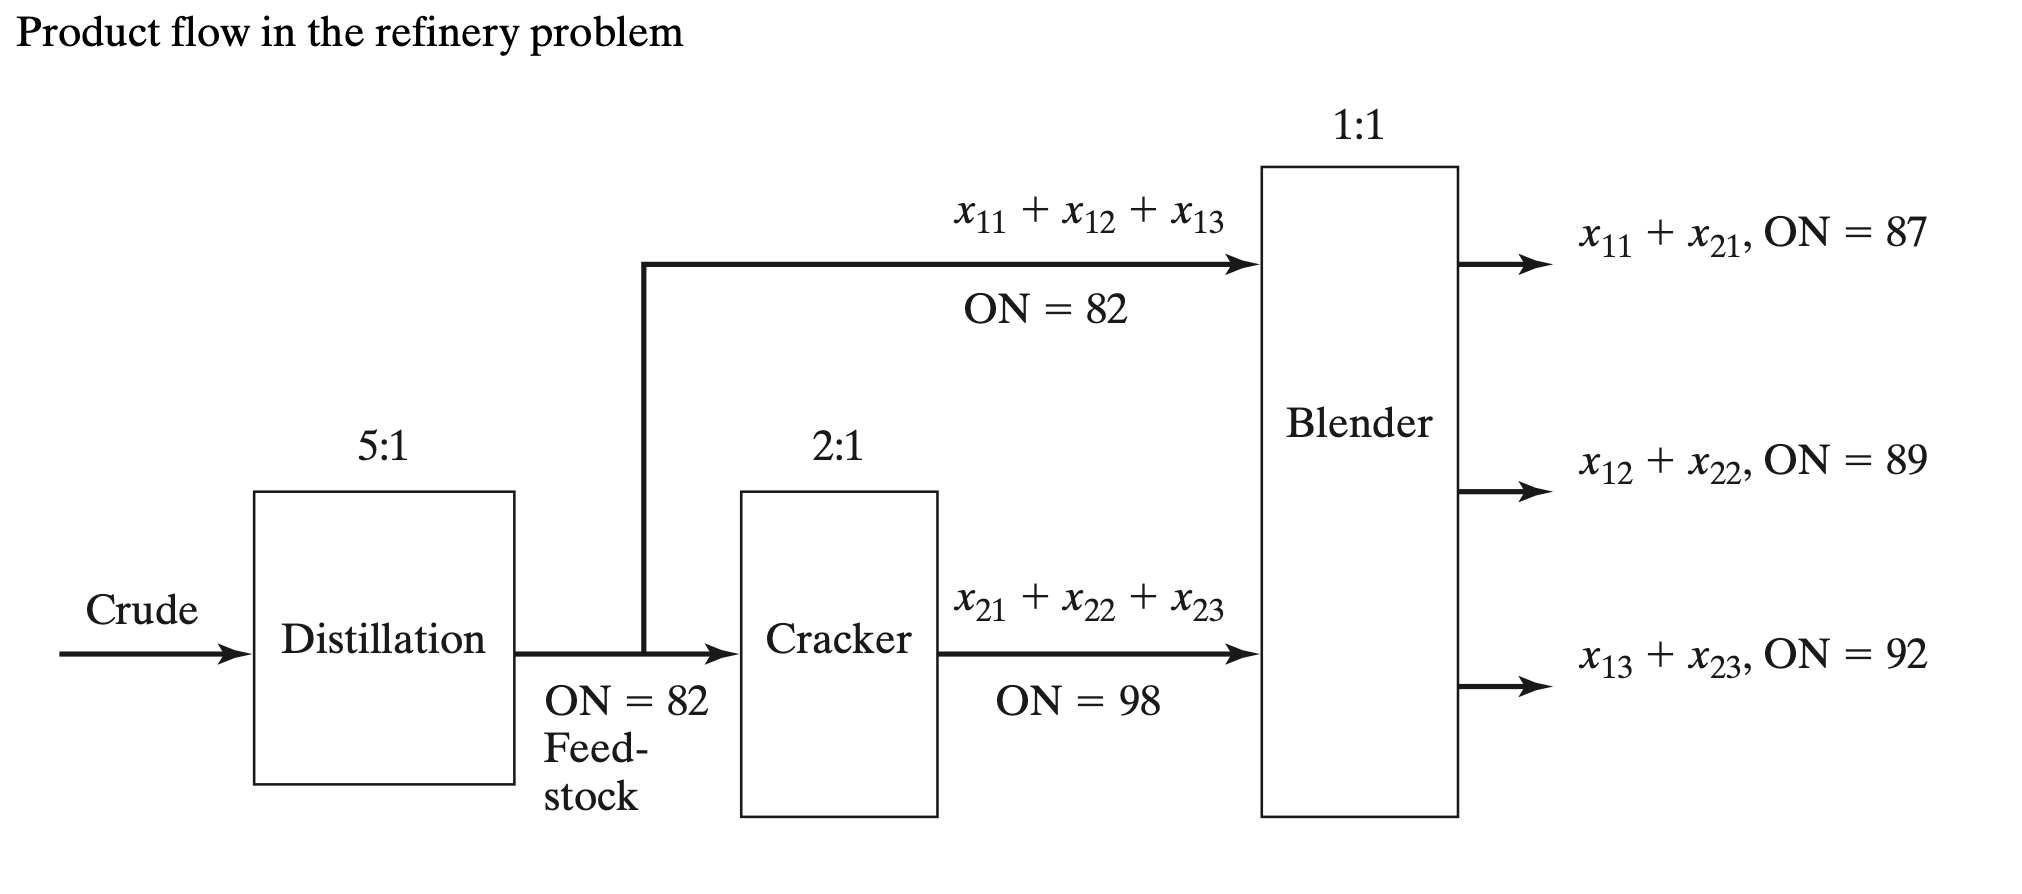

In [27]:
model = Model(GLPK.Optimizer)
@variable(model, x11 >= 0)
@variable(model, x12 >= 0)
@variable(model, x13 >= 0)
@variable(model, x21 >= 0)
@variable(model, x22 >= 0)
@variable(model, x23 >= 0)
# input capacity limits <= 1.5M
@constraint(model, 0 <= 5 * x11 + 5 * x12 + 5 * x13 + 10 * x21 + 10 * x22 + 10 * x23 <= 1_500_000)
# input capcity limits to cracker <= 200,000
@constraint(model, 0 <= 2 * (x21 + x22 + x23) <= 200_000)
# demand limit for regular
@constraint(model, 0 <= x11 + x21 <= 50_000)
# demand limit for premium
@constraint(model, 0 <= x12 + x22 <= 30_000)
# demand limit for super
@constraint(model, 0 <= x13 + x23 <= 40_000)
# objective function
@objective(model, Max, 6.7 * (x11 + x21) + 7.2 * (x12 + x22) + 8.1 * (x13 + x23))
# optimize
optimize!(model)
println("max profix = ", objective_value(model))
println("daily input = ", 5 * value(x11) + 5 * value(x12) + 5 * value(x13) + 10 * value(x21) + 10 * value(x22) + 10 * value(x23))
println("x11 = ", value(x11))
println("x12 = ", value(x12))
println("x13 = ", value(x13))
println("x21 = ", value(x21))
println("x22 = ", value(x22))
println("x23 = ", value(x23))

max profix = 875000.0
daily input = 600000.0
x11 = 50000.0
x12 = 30000.0
x13 = 40000.0
x21 = 0.0
x22 = 0.0
x23 = 0.0


## Q6 
Consider the following tour of a graph with 5 nodes A,B,C,D and E. You may consider
A to be the starting point of the tour.

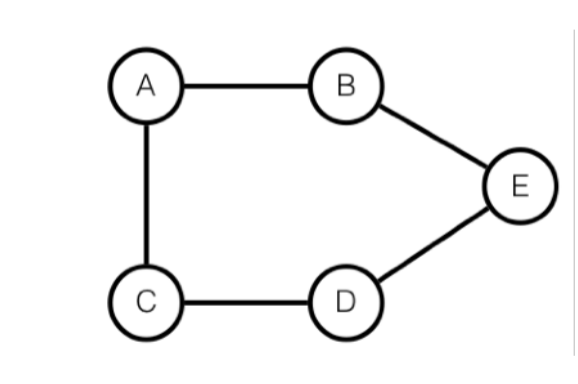

(i) Give all the 2-change neighbours of this tour (note that 2 tours that differ only in their
direction, i.e., have the same set of edges, are to be counted as being the same).

(ii) In a graph with n nodes, how many 2-change neighbours of any given tour are there?

In [ ]:
(i) All 2-change neighbours:
by removing AB and ED, we have AEBDC
by removing BE and CD, we have ABDEC
by removing AB and CD, we have ADEBC
by removing AC and BE, we have ABCDE
by removing AC and ED, we have ABECD

(ii) There are n * (n - 3)/2 two-change neightbours of a given tour with n nodes